# Assignment 1

## Part 1: K-nearest neighbours
Implement the k-nearest neighbors (k-NN) algorithm from scratch.  This involves writing the core k-NN functionality, including calculating the distances between data points and making predictions based on a majority vote among the k-nearest neighbors.

In [618]:
# Imports
import  numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

### KNN Implementation

In [619]:
class KNN:
    def __init__(self,k=3,dist_metric = "euclidean"):
        self.k = k
        self.dist_metric = dist_metric.lower()

        self.available_metircs = ['euclidean','manhattan']
        assert self.dist_metric in self.available_metircs,f"Invalid Distance Metric\nAviable Metrics:\n\t{self.get_metric_list()}"

    def get_metric_list(self):
        return "\n\t".join(value for value in self.distance_metrics)

    def __str__(self):
        return f"(K={self.k},Distance Metric={self.dist_metric.upper()})"

    def __dimension_check(self,p1,p2):
        assert len(p1) == len(p2), "Points should have the same dimensions."

    def __euclidean(self,p1,p2):
        self.__dimension_check(p1,p2)
        return np.sqrt(np.sum((p1 - p2) ** 2))

    def __manhattan(self,p1,p2):
        self.__dimension_check(p1, p2)
        return np.sum(np.abs(p1-p2))

    def fit(self,x_train,y_train):
        self.X_train = x_train
        self.y_train = y_train.flatten()

    def predict(self, X_test):

        predictions = [self.__predict(x) for x in X_test]
        return predictions

    def __predict(self,x):
        distance_functions = {
            "euclidean": lambda:self.__euclidean,
            "manhattan": lambda: self.__manhattan,
        }

        algo = distance_functions.get(self.dist_metric)()
        # compute the distances
        distances = [
            (algo(x, xTrain), i) for i, xTrain in enumerate(self.X_train)
        ]
        # the nearest neighbours

        distances.sort(key=lambda x:x[0])

        neighbors = [self.y_train[i] for _, i in distances[: self.k]]
        # determine label with majority vote
        most_common = Counter(neighbors).most_common(1)[0][0]
        return  most_common

    def score(self,ytest,ypred):
        y_true = ytest.flatten()
        total_samples = len(y_true)
        correct_predictions = np.sum(y_true == ypred)
        return (correct_predictions / total_samples)*100   

## Data Preperation

In [620]:
X_train = pd.read_csv("knn-dataset/train_inputs.csv").to_numpy()
x_test = pd.read_csv("knn-dataset/test_inputs.csv").to_numpy()
y_train = pd.read_csv("knn-dataset/train_labels.csv").to_numpy()
y_test = pd.read_csv("knn-dataset/test_labels.csv").to_numpy()

In [621]:
print(f"Shape Training Data: {X_train.shape}")
print(f"Shape Training Labels: {y_train.shape}")
print(f"Shape Testing Data: {x_test.shape}")
print(f"Shape Testing Labels: {y_test.shape}")

Shape Training Data: (999, 64)
Shape Training Labels: (999, 1)
Shape Testing Data: (109, 64)
Shape Testing Labels: (109, 1)


In [622]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

## Testing KKN

In [623]:
# Initilialize Model
model = KNN(k=2)
print(model)

(K=2,Distance Metric=EUCLIDEAN)


In [624]:
# fit model
model.fit(X_train,y_train)

In [625]:
y_pred = model.predict(x_test)
model_accuracy = model.score(y_test,y_pred)
print(f"Model Accuracy: {model_accuracy:.4f}")


Model Accuracy: 70.6422


## Results

In [626]:
from sklearn.model_selection import KFold

In [627]:
# Perform K Fold Cross Validation
kf = KFold(n_splits=10,shuffle=False)
k_values = range(1,31)
avg_accuracy = []

In [628]:
# combine data
X = np.concatenate((X_train, x_test))
y = np.concatenate((y_train, y_test))

In [629]:
# perform testing
for k in k_values:
    accuracies = []
    for train_index, test_index in kf.split(X):
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        
        knn = KNN(k=k)
        knn.fit(Xtrain, ytrain)
        ypred = knn.predict(Xtest)
        accuracies.append(model.score(ytest,ypred))
    
    avg_accuracy.append(np.mean(accuracies))

In [630]:
print(avg_accuracy)

[np.float64(72.92547092547093), np.float64(72.92547092547093), np.float64(77.25962325962327), np.float64(77.08026208026209), np.float64(78.87960687960688), np.float64(78.6085176085176), np.float64(78.6101556101556), np.float64(78.43079443079444), np.float64(78.79197379197379), np.float64(78.33742833742834), np.float64(78.51842751842752), np.float64(77.7968877968878), np.float64(78.24406224406223), np.float64(78.69942669942671), np.float64(77.70761670761672), np.float64(78.69942669942671), np.float64(77.52825552825553), np.float64(78.61015561015562), np.float64(78.52006552006551), np.float64(78.97215397215398), np.float64(78.52088452088454), np.float64(79.15069615069615), np.float64(79.05978705978706), np.float64(79.06060606060606), np.float64(78.25061425061426), np.float64(79.51351351351352), np.float64(78.70024570024572), np.float64(79.42342342342343), np.float64(78.88370188370187), np.float64(79.33333333333333)]


In [635]:
# Best k
best_k = 5
best_accuracy = avg_accuracy[best_k-1]
print(f"Best k: {best_k} with accuracy: {best_accuracy:.4f}")

Best k: 5 with accuracy: 78.8796


In [632]:
df = pd.DataFrame(avg_accuracy)
df

,0
0,72.925471
1,72.925471
2,77.259623
3,77.080262
4,78.879607
5,78.608518
6,78.610156
7,78.430794
8,78.791974
9,78.337428


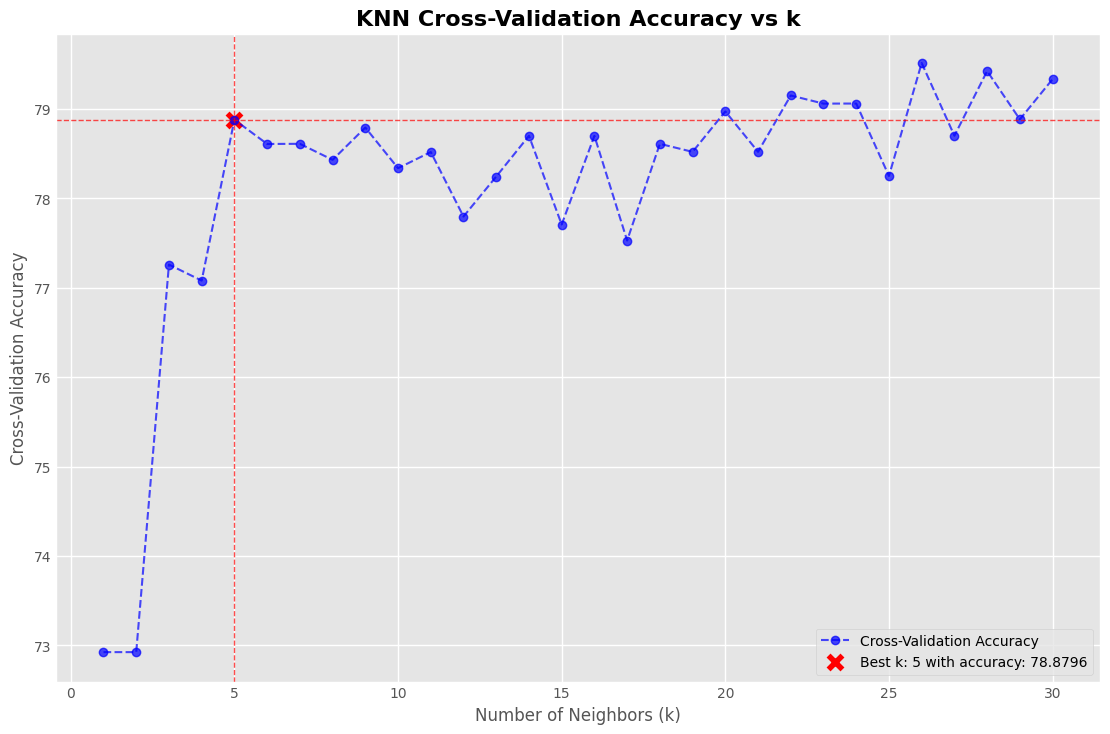

In [636]:
# Plot results
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
plt.plot(
    k_values,
    avg_accuracy,
    marker="o",
    linestyle="dashed",
    label="Cross-Validation Accuracy",
    alpha=0.7,
    linewidth=1.5,
    color="blue"
)
plt.scatter(
    best_k,
    best_accuracy,
    marker="x",
    label=f"Best k: {best_k} with accuracy: {best_accuracy:.4f}",
    c="red",
    s=100,
)
plt.axvline(
    best_k,
    linestyle="dashed",
    alpha=0.7,
    c="red",
    linewidth=1)
plt.axhline(
    best_accuracy,
    linestyle="dashed",
    alpha=0.7,
    c="red",
    linewidth=1)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("KNN Cross-Validation Accuracy vs k", fontsize=16, fontweight="bold")
plt.legend()
plt.show()

In [634]:
knn = KNN(k=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(x_test)
print(f"Test accuracy with best k ({best_k}): {knn.score(y_test,y_pred):.4f}")

Test accuracy with best k (5): 77.0642
